In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from xgboost import XGBRegressor

1) What are the primary factors affecting house prices in the UK?
2) Can we accurately predict house prices based on these factors?
6) What is the effect of sales volume?

In [274]:
df = pd.read_csv('finalised.csv')
pd.set_option('display.max_columns', None)
df

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2013,East Midlands,E12000004,137536.5355,89.501836,89.73525,-1.036673,0.856126,137895.2167,3447.0,200466.4154,89.423104,-1.193768,0.590013,125871.9192,89.523235,-0.480266,1.000317,104184.0939,89.536952,-1.419657,1.170055,84401.12070,89.651911,-1.543957,0.252382,133403.4483,89.491333,-1.177310,0.590938,1218.0,139597.1125,89.508500,-0.966570,0.988435,2229.0,115710.6914,89.362625,-1.128118,0.869268,155419.3751,89.590349,-0.981456,0.848197,173897.6555,86.715297,-3.977678,0.034394,217.0,134817.7424,89.798194,-0.712662,0.945563,3230.0
1,01/02/2013,East Midlands,E12000004,137599.2999,89.542680,89.74266,0.045635,1.099802,137906.6118,3522.0,200483.5222,89.430735,0.008533,0.961844,125569.5210,89.308161,-0.240243,1.251734,104680.6179,89.963670,0.476583,1.420057,84376.23819,89.625480,-0.029481,-0.436583,133737.2012,89.715226,0.250183,0.953149,1202.0,139514.9559,89.455822,-0.058853,1.021835,2320.0,116006.0573,89.590734,0.255262,1.175065,155282.7486,89.511591,-0.087908,0.888572,175581.5732,87.554994,0.968338,0.532139,307.0,134753.3618,89.755312,-0.047754,1.167650,3215.0
2,01/03/2013,East Midlands,E12000004,138561.8313,90.169047,90.19189,0.699518,1.121401,138596.9279,4585.0,202609.4709,90.379068,1.060411,2.276697,126060.2481,89.657179,0.390801,0.534181,105164.3792,90.379420,0.462131,0.591987,85437.96257,90.753257,1.258322,-0.446283,134746.7311,90.392451,0.754861,0.972326,1560.0,140451.4016,90.056263,0.671215,1.192130,3025.0,116651.0514,90.088859,0.556000,0.558074,156511.3597,90.219815,0.791209,1.460478,180069.6051,89.792983,2.556095,1.854837,572.0,135444.0406,90.215353,0.512550,1.060622,4013.0
3,01/04/2013,East Midlands,E12000004,139314.2861,90.658707,90.45051,0.543046,0.631746,138994.3555,4258.0,203308.7097,90.690981,0.345117,0.189750,127146.9005,90.430033,0.862010,0.808453,105690.3135,90.831414,0.500107,1.287517,85583.04109,90.907361,0.169806,-0.653372,135471.3285,90.878534,0.537748,0.627936,1493.0,141217.9252,90.547752,0.545757,0.630151,2765.0,117283.5250,90.577314,0.542193,0.793107,157362.1413,90.710242,0.543591,0.532207,179464.4630,89.491225,-0.336060,1.104084,390.0,136301.2755,90.786333,0.632907,0.593136,3868.0
4,01/05/2013,East Midlands,E12000004,141012.3511,91.763722,90.93737,1.218874,1.997612,139742.5070,5780.0,205321.7128,91.588932,0.990121,1.746837,128733.6797,91.558590,1.247989,2.102901,107169.5347,92.102673,1.399581,2.387263,87084.01868,92.501718,1.753826,1.186259,137123.5017,91.986865,1.219574,1.826274,1874.0,142938.6870,91.651090,1.218515,2.079485,3906.0,118820.9530,91.764660,1.310864,2.084645,159187.8788,91.762675,1.160214,1.939582,181727.5737,90.619741,1.261036,2.393503,501.0,137956.7711,91.889010,1.214586,1.967697,5279.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,01/10/2023,Yorkshire and The Humber,E12000003,209062.0000,153.500000,149.70000,1.000000,-0.500000,203850.0000,4960.0,333986.0000,153.300000,0.700000,-0.600000,210213.0000,157.000000,1.200000,-0.200000,167392.0000,153.900000,0.900000,-0.700000,139411.00000,139.800000,1.500000,-1.400000,199397.0000,151.200000,1.100000,-0.800000,1674.0,213917.0000,154.600000,1.000000,-0.4000

In [275]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                      datetime64[ns]
RegionName                        object
AreaCode                          object
AveragePrice                     float64
Index                            float64
IndexSA                          float64
1m%Change                        float64
12m%Change                       float64
AveragePriceSA                   float64
SalesVolume                      float64
DetachedPrice                    float64
DetachedIndex                    float64
Detached1m%Change                float64
Detached12m%Change               float64
SemiDetachedPrice                float64
SemiDetachedIndex                float64
SemiDetached1m%Change            float64
SemiDetached12m%Change           float64
TerracedPrice                    float64
TerracedIndex                    float64
Terraced1m%Change                float64
Terraced12m%Change               float64
FlatPrice                        float64
FlatIndex                        float64
Flat1m%Change   

In [276]:
by_region = df.groupby('RegionName')[['AveragePrice','Index', 'SalesVolume', 'MortgagePrice']].mean().sort_values(by='AveragePrice', ascending=False)
by_region_styled = by_region.style.format({
    'AveragePrice': '£{0:,.0f}', 
    'Index': '{0:,.0f}', 
    'SalesVolume': '{0:,.0f}', 
    'MortgagePrice': '£{0:,.0f}'
    })
by_region_styled

,AveragePrice,Index,SalesVolume,MortgagePrice
RegionName,,,,
London,"£461,586",115,"8,104","£454,432"
South East,"£315,171",119,"12,311","£322,036"
East of England,"£279,994",123,"8,332","£286,678"
South West,"£254,054",119,"8,113","£255,610"
England,"£243,849",120,"68,420","£250,843"
England and Wales,"£239,344",120,"72,056","£246,341"
Great Britain,"£231,145",120,"80,205","£237,791"
West Midlands Region,"£195,085",123,"6,601","£198,719"
East Midlands,"£190,241",124,"6,289","£193,386"


In [277]:
by_region = by_region.reset_index()

london_avg = by_region.loc[by_region['RegionName'] == 'London']
london_avg = london_avg['AveragePrice'].round(0)
london_avg_increase = london_avg - by_region['AveragePrice'].mean()
london_avg_increase = london_avg_increase.round(0).astype(int)
london_avg_increase_styled = london_avg_increase.apply(lambda x: f'£{x:.0f}')
london_avg_increase_final = '£233.716'

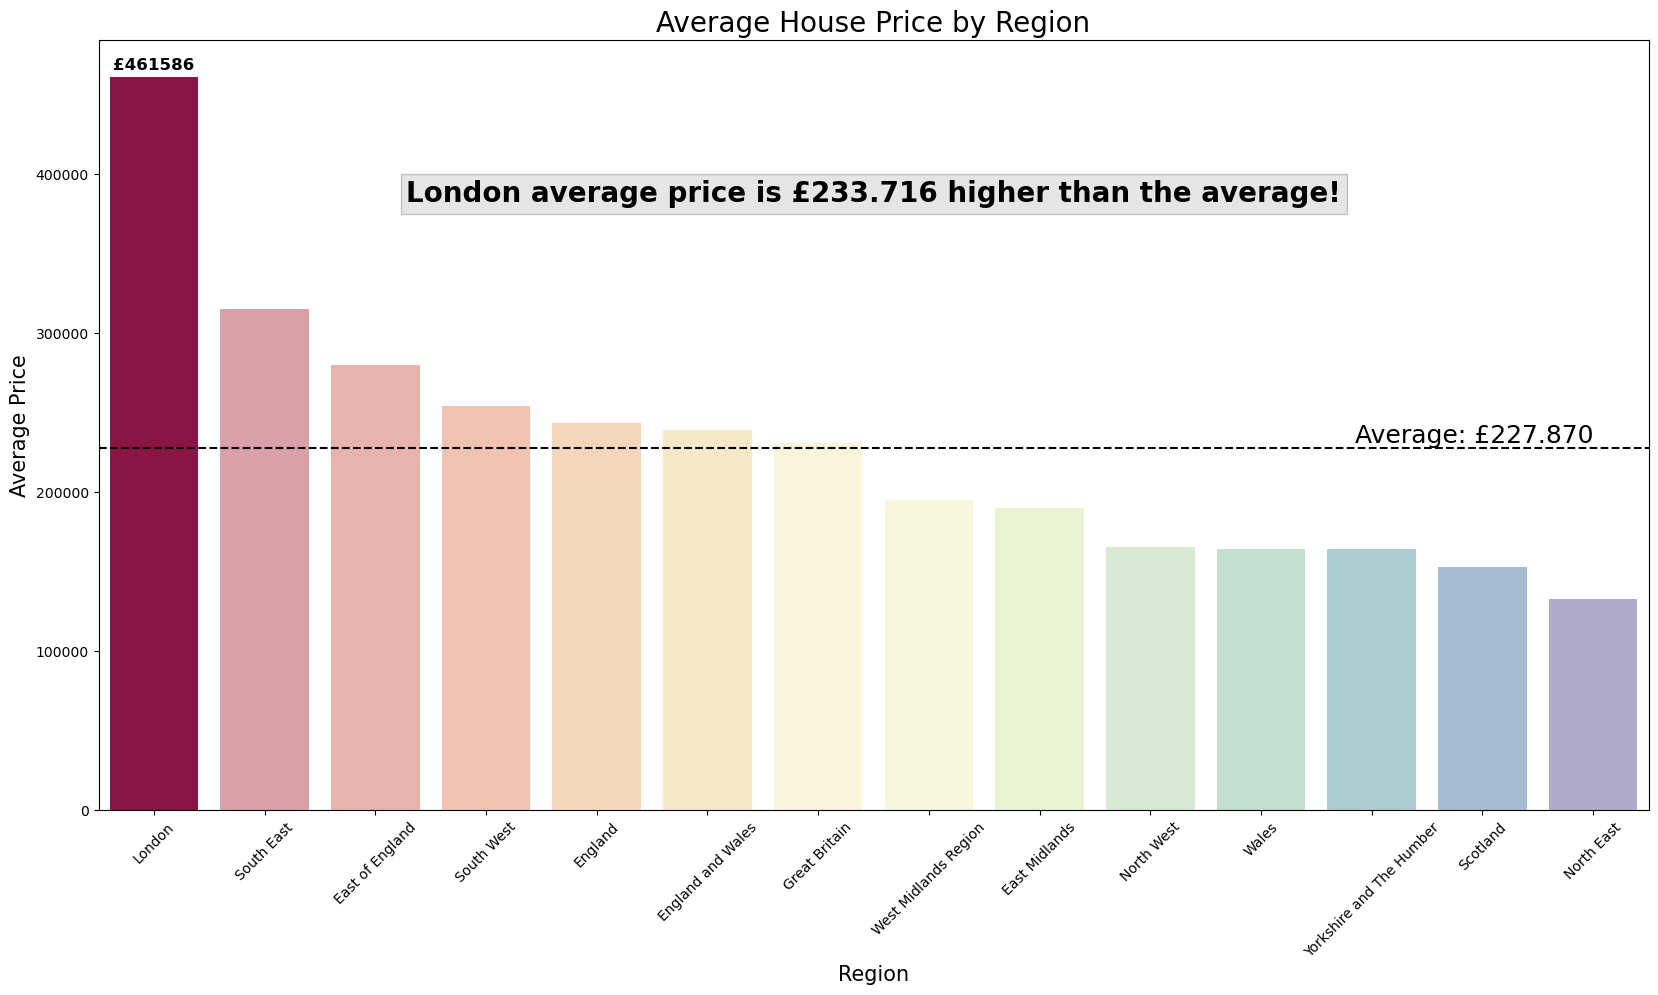

One of the factors that influence the house price is the region, in this case London has the highest average price, index and mortgage price.
However, the sales volume is higher in the South East region.


In [278]:
# df_long = pd.melt(by_region, id_vars='RegionName', value_vars=['AveragePrice', 'SalesVolume', 'MortgagePrice'],
#                   var_name='Metric', value_name='Value')

# Plotting
average_value_for_plot = '£227.870'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, len(by_region['RegionName'].unique()))]
plt.figure(figsize=(20, 10))
ax =sns.barplot(x='RegionName', y='AveragePrice', palette=colors, data=by_region)
plt.xticks(rotation=45)

# Adding average line
average_value = np.mean(by_region['AveragePrice'])
plt.axhline(average_value, color='black', linestyle='--', label='Average Value')
plt.text(len(by_region['RegionName'].unique())-1, average_value, f'Average: {average_value_for_plot}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=18)

for bar, region in zip(ax.patches, by_region['RegionName']):
    if region != 'London':
        bar.set_alpha(0.5)
    else:
        #add lable to London
        height = bar.get_height()
        ax.annotate(f'£{height:.0f}', xy=(bar.get_x() + bar.get_width() /2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
        
plt.text(0.5, 0.8, f'London average price is {london_avg_increase_final} higher than the average!',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
         fontsize=20, fontweight='bold', bbox=dict(facecolor='gray', alpha=0.2))

plt.xlabel('Region', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average House Price by Region', fontsize=20)
plt.show()

print('One of the factors that influence the house price is the region, in this case London has the highest average price, index and mortgage price.')
print('However, the sales volume is higher in the South East region.')

In [279]:
df['date_only'] = df['Date'].dt.year
by_date = df.groupby('date_only')[['AveragePrice', 'Index', 'SalesVolume', 'MortgagePrice']].mean().sort_values(by='date_only', ascending=True)
by_date['Change'] = by_date['AveragePrice'].pct_change()*100

by_date = by_date.fillna(0)
by_date['Change'] = by_date['Change'].round(2)
total_change = by_date['Change'].sum()
by_date['Change'] = by_date['Change'].astype(str) + '%'
total_change_styled = f'{total_change:.2f}%'
print(f'Total change in average price from 1995 to 2020: {total_change_styled}')



by_date = by_date.reset_index()
# Preprocess the data
by_date['Change'] = by_date['Change'].str.replace('%', '').astype(float)
years = by_date['date_only']
average_prices = by_date['AveragePrice']
percentage_changes = by_date['Change']

by_date


Total change in average price from 1995 to 2020: 48.65%


,date_only,AveragePrice,Index,SalesVolume,MortgagePrice,Change
0,2013,172203.675635,91.520132,19754.404762,174664.318474,0.00
1,2014,186494.548755,98.003664,23356.541667,189396.556068,8.30
2,2015,198714.032554,103.660392,23277.732143,202016.179157,6.55
3,2016,213170.537250,110.419861,23184.922619,217045.878002,7.28
4,2017,222610.939861,115.349358,22971.648810,226559.047998,4.43
5,2018,228655.010296,118.950176,22179.160714,232919.470226,2.72
6,2019,230117.565017,120.180704,21488.523810,234565.685084,0.64
7,2020,236497.078864,123.625955,18034.785714,241293.143605,2.77
8,2021,254390.482143,133.947024,27427.357143,259270.023810,7.57
9,2022,277834.369048,146.642262,21904.946429,283425.565476,9.22


d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


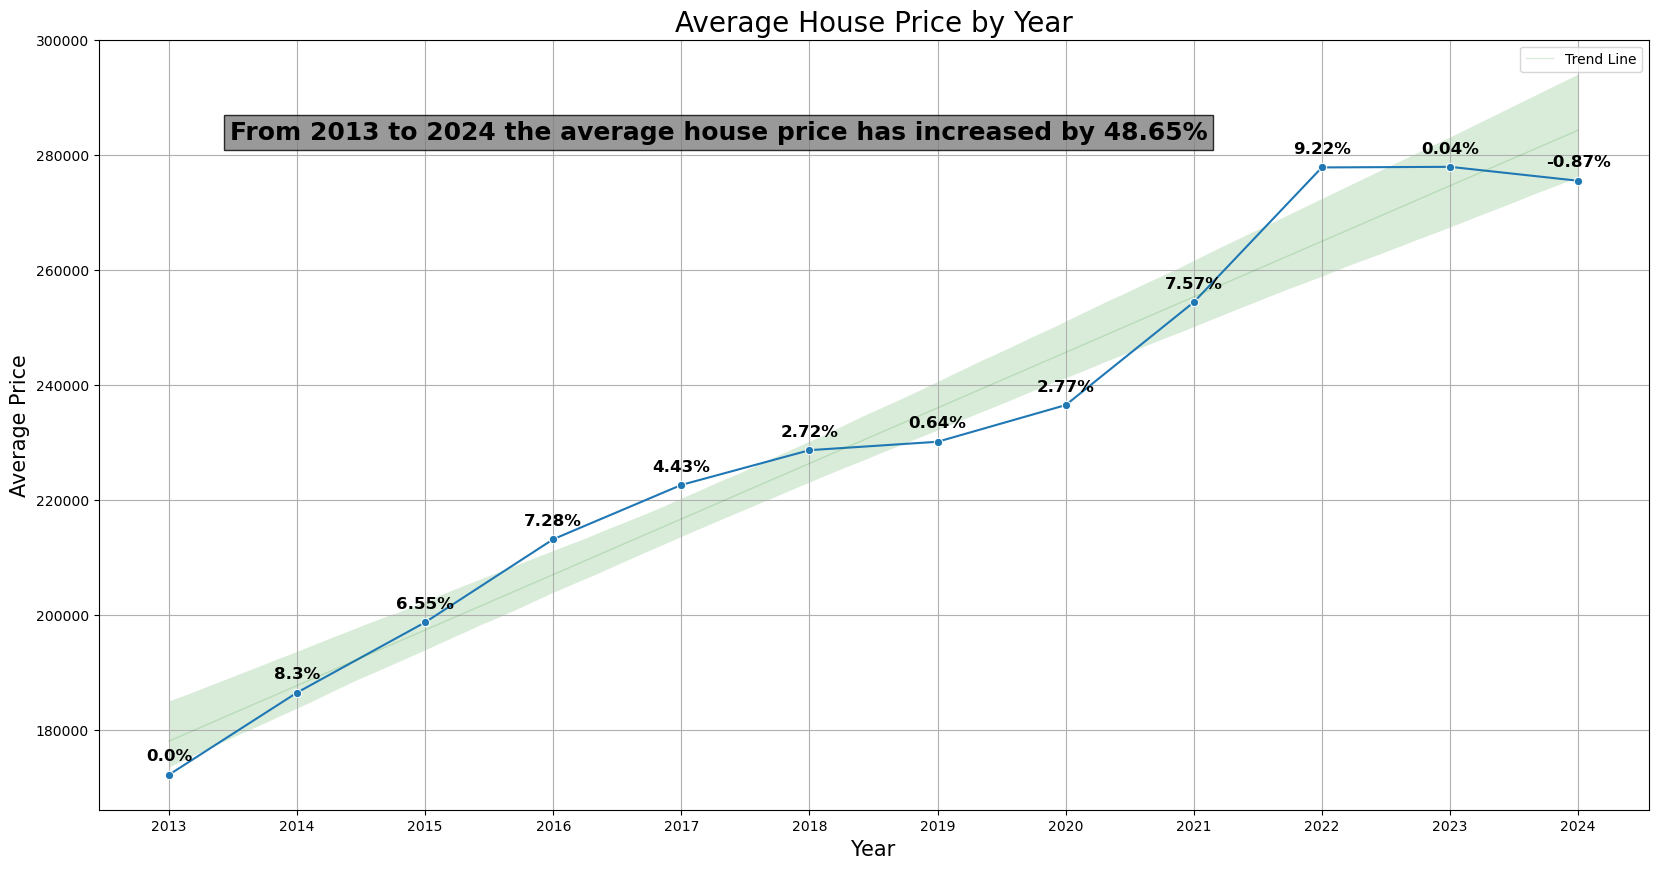

In [291]:
# Plotting
plt.figure(figsize=(20, 10))
ax = sns.lineplot(data=by_date, x='date_only', y='AveragePrice', marker='o')
sns.regplot(data=by_date, x='date_only', y='AveragePrice', scatter=False, color='green', label='Trend Line', line_kws={'linewidth': 1, 'alpha': 0.15}, scatter_kws={'alpha': 0.1})
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average House Price by Year', fontsize=20)
plt.xticks(by_date['date_only'])

plt.text(0.4, 0.88, f'From 2013 to 2024 the average house price has increased by {total_change_styled}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
         fontsize=18, fontweight='bold', bbox=dict(facecolor='gray', alpha=0.8))
plt.grid(True)

# Annotate percentage changes
for i in range(len(by_date)):
    plt.annotate(f'{percentage_changes[i]}%', 
                 (years[i], average_prices[i]), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=12,
                 fontweight='bold')

plt.legend()
plt.show()

In [ ]:
inertia = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(by_region[['AveragePrice', 'Index', 'SalesVolume', 'MortgagePrice']])
    inertia.append(kmeans.inertia_)

d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

In [ ]:
elbow_data = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_data.head()

,k,inertia
0,1,1.961124e+11
1,2,7.941884e+10
2,3,2.157699e+10
3,4,9.617115e+09
4,5,5.909470e+09


<Axes: xlabel='k'>

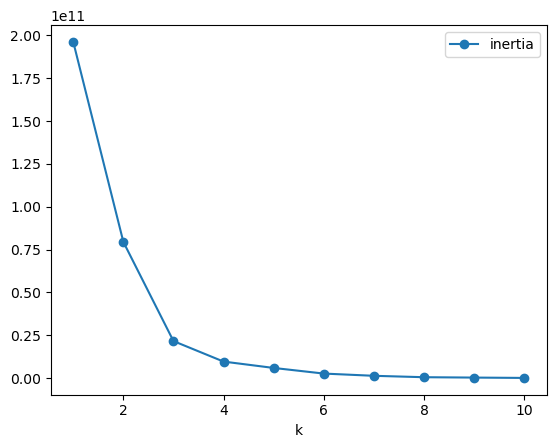

In [ ]:
elbow_data.plot(x='k', y='inertia', marker='o')

In [ ]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(by_region[['AveragePrice', 'Index', 'SalesVolume', 'MortgagePrice']])
k_4 = model.predict(by_region[['AveragePrice', 'Index', 'SalesVolume', 'MortgagePrice']])
predictions_df = by_region.copy()
predictions_df['Cluster'] = k_4

d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Users\Vittorio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='AveragePrice', ylabel='SalesVolume'>

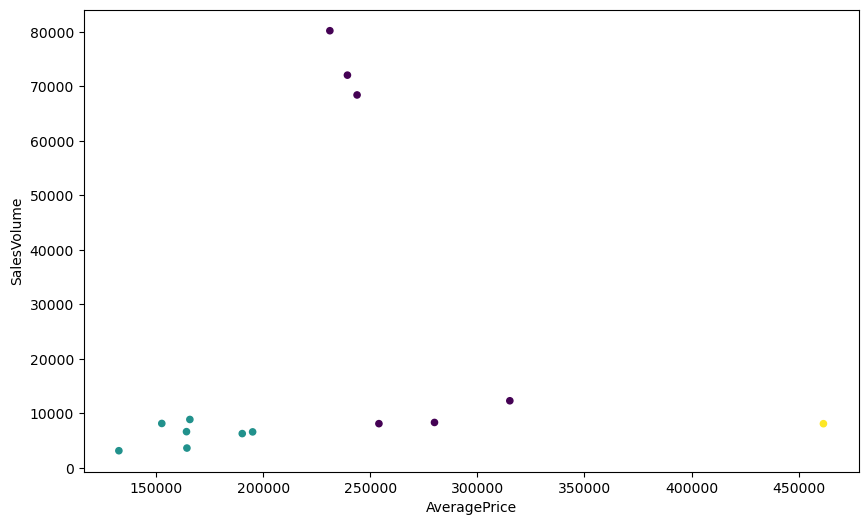

In [ ]:
predictions_df.plot.scatter(x='AveragePrice', y='SalesVolume', c='Cluster', cmap='viridis', colorbar=False, figsize=(10, 6))

In [ ]:
df.describe()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,Detached12m%Change,SemiDetachedPrice,SemiDetachedIndex,SemiDetached1m%Change,SemiDetached12m%Change,TerracedPrice,TerracedIndex,Terraced1m%Change,Terraced12m%Change,FlatPrice,FlatIndex,Flat1m%Change,Flat12m%Change,CashPrice,CashIndex,Cash1m%Change,Cash12m%Change,CashSalesVolume,MortgagePrice,MortgageIndex,Mortgage1m%Change,Mortgage12m%Change,MortgageSalesVolume,FTBPrice,FTBIndex,FTB1m%Change,FTB12m%Change,FOOPrice,FOOIndex,FOO1m%Change,FOO12m%Change,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1.876000e+03,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,227869.837006,119.435565,118.388898,0.375041,4.589032,226141.837283,21491.785181,3.711650e+05,119.876925,0.385711,4.646445,233678.973484,120.850138,0.404243,4.867231,192953.340067,120.284264,0.385472,4.732445,169700.242514,115.901101,0.314717,3.880309,220212.103554,118.771909,0.363761,4.434398,6548.829957,232110.945526,119.751926,0.380863,4.662136,14768.525053,191272.004344,119.385492,0.374025,4.567432,259958.169858,119.495856,0.377766,4.613729,275426.254604,120.168882,0.520399,5.132430,2219.884328,225270.635655,119.622752,0.373522,4.607684,19271.900853
std,89760.788910,18.466081,18.288828,1.358766,3.957069,89807.494659,28826.360572,1.746872e+05,18.653215,1.365187,3.859325,113849.736828,19.757188,1.303938,3.869760,98039.470225,19.368096,1.635920,4.229202,80423.587718,14.944585,1.615396,4.401489,94817.632313,17.974886,1.454444,4.002306,8818.509074,88238.821434,18.717900,1.331215,3.950849,19933.573509,76841.585827,18.407169,1.401056,4.050663,101788.862816,18.534470,1.355923,3.902531,84611.518829,19.207159,2.325384,3.840945,3216.418219,90632.546060,18.737576,1.431814,4.090609,25830.428747
min,112007.912300,77.290881,77.240070,-8.300000,-5.100000,110711.944000,1003.000000,1.864454e+05,78.674844,-12.996736,-6.909703,112873.835000,78.284491,-7.200000,-4.400000,91579.226440,77.422216,-9.900000,-5.700000,78665.694810,76.622498,-10.300000,-5.900000,103646.980400,77.428213,-9.100000,-6.100000,264.000000,116734.991500,77.245143,-8.000000,-4.900000,459.000000,96642.009660,76.841553,-8.300000,-5.300000,126996.179100,77.690681,-8.400000,-4.900000,149146.967300,73.775963,-6.812824,-8.074330,5.000000,108864.361900,77.661143,-8.900000,-5.400000,915.000000
25%,159812.000000,104.978807,103.450910,-0.256011,1.789094,157183.316500,5798.000000,2.594509e+05,105.257311,-0.276091,1.880829,158725.480150,105.151776,-0.202718,2.103350,125623.320325,104.969264,-0.388748,1.820726,111696.499900,104.311429,-0.491909,0.436928,150861.629775,104.783005,-0.300000,1.584585,1685.500000,163762.211425,105.115416,-0.243763,1.881686,3911.000000,135375.303125,104.946202,-0.300000,1.660517,182394.194300,104.964290,-0.254815,1.858252,209806.481725,103.867433,-0.854751,2.500000,520.000000,156178.709500,105.061504,-0.282392,1.723492,5247.000000
50%,208069.470250,118.905874,118.295985,0.400000,4.326106,206185.965350,8056.000000,3.245986e+05,119.447107,0.380296,4.460161,203005.140050,120.134176,0.434552,4.499996,166310.500000,118.996486,0.405062,4.194413,145839.500000,117.104684,0.300484,3.715517,197663.000000,117.896124,0.400489,4.229687,2473.000000,212463.871400,119.297968,0.400000,4.354884,5538.500000,175373.197700,119.007552,0.415484,4.281357,236086.000000,118.778687,0.369612,

d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


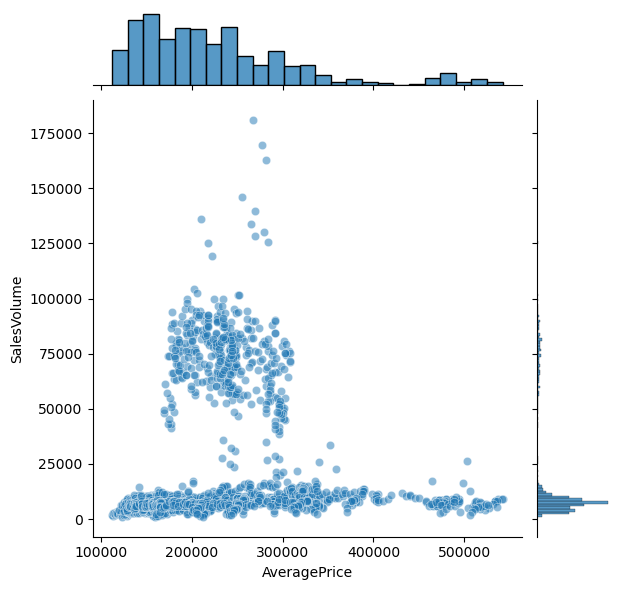

In [ ]:
sns.jointplot(x='AveragePrice', y='SalesVolume', data=df, alpha=0.5)

In [ ]:
dummies = pd.get_dummies(df['RegionName']).astype(int)
df_with_dummies = pd.concat([df[['AveragePrice', 'SalesVolume', 'MortgagePrice',]], dummies], axis=1)
df_with_dummies

,AveragePrice,SalesVolume,MortgagePrice,East Midlands,East of England,England,England and Wales,Great Britain,London,North East,North West,Scotland,South East,South West,Wales,West Midlands Region,Yorkshire and The Humber
0,137536.5355,3447.0,139597.1125,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,137599.2999,3522.0,139514.9559,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,138561.8313,4585.0,140451.4016,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,139314.2861,4258.0,141217.9252,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,141012.3511,5780.0,142938.6870,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,209062.0000,4960.0,213917.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1872,207186.0000,4828.0,211957.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1873,204561.0000,4136.0,209428.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1874,204703.0000,2848.0,209490.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,1


d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Users\Vittorio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

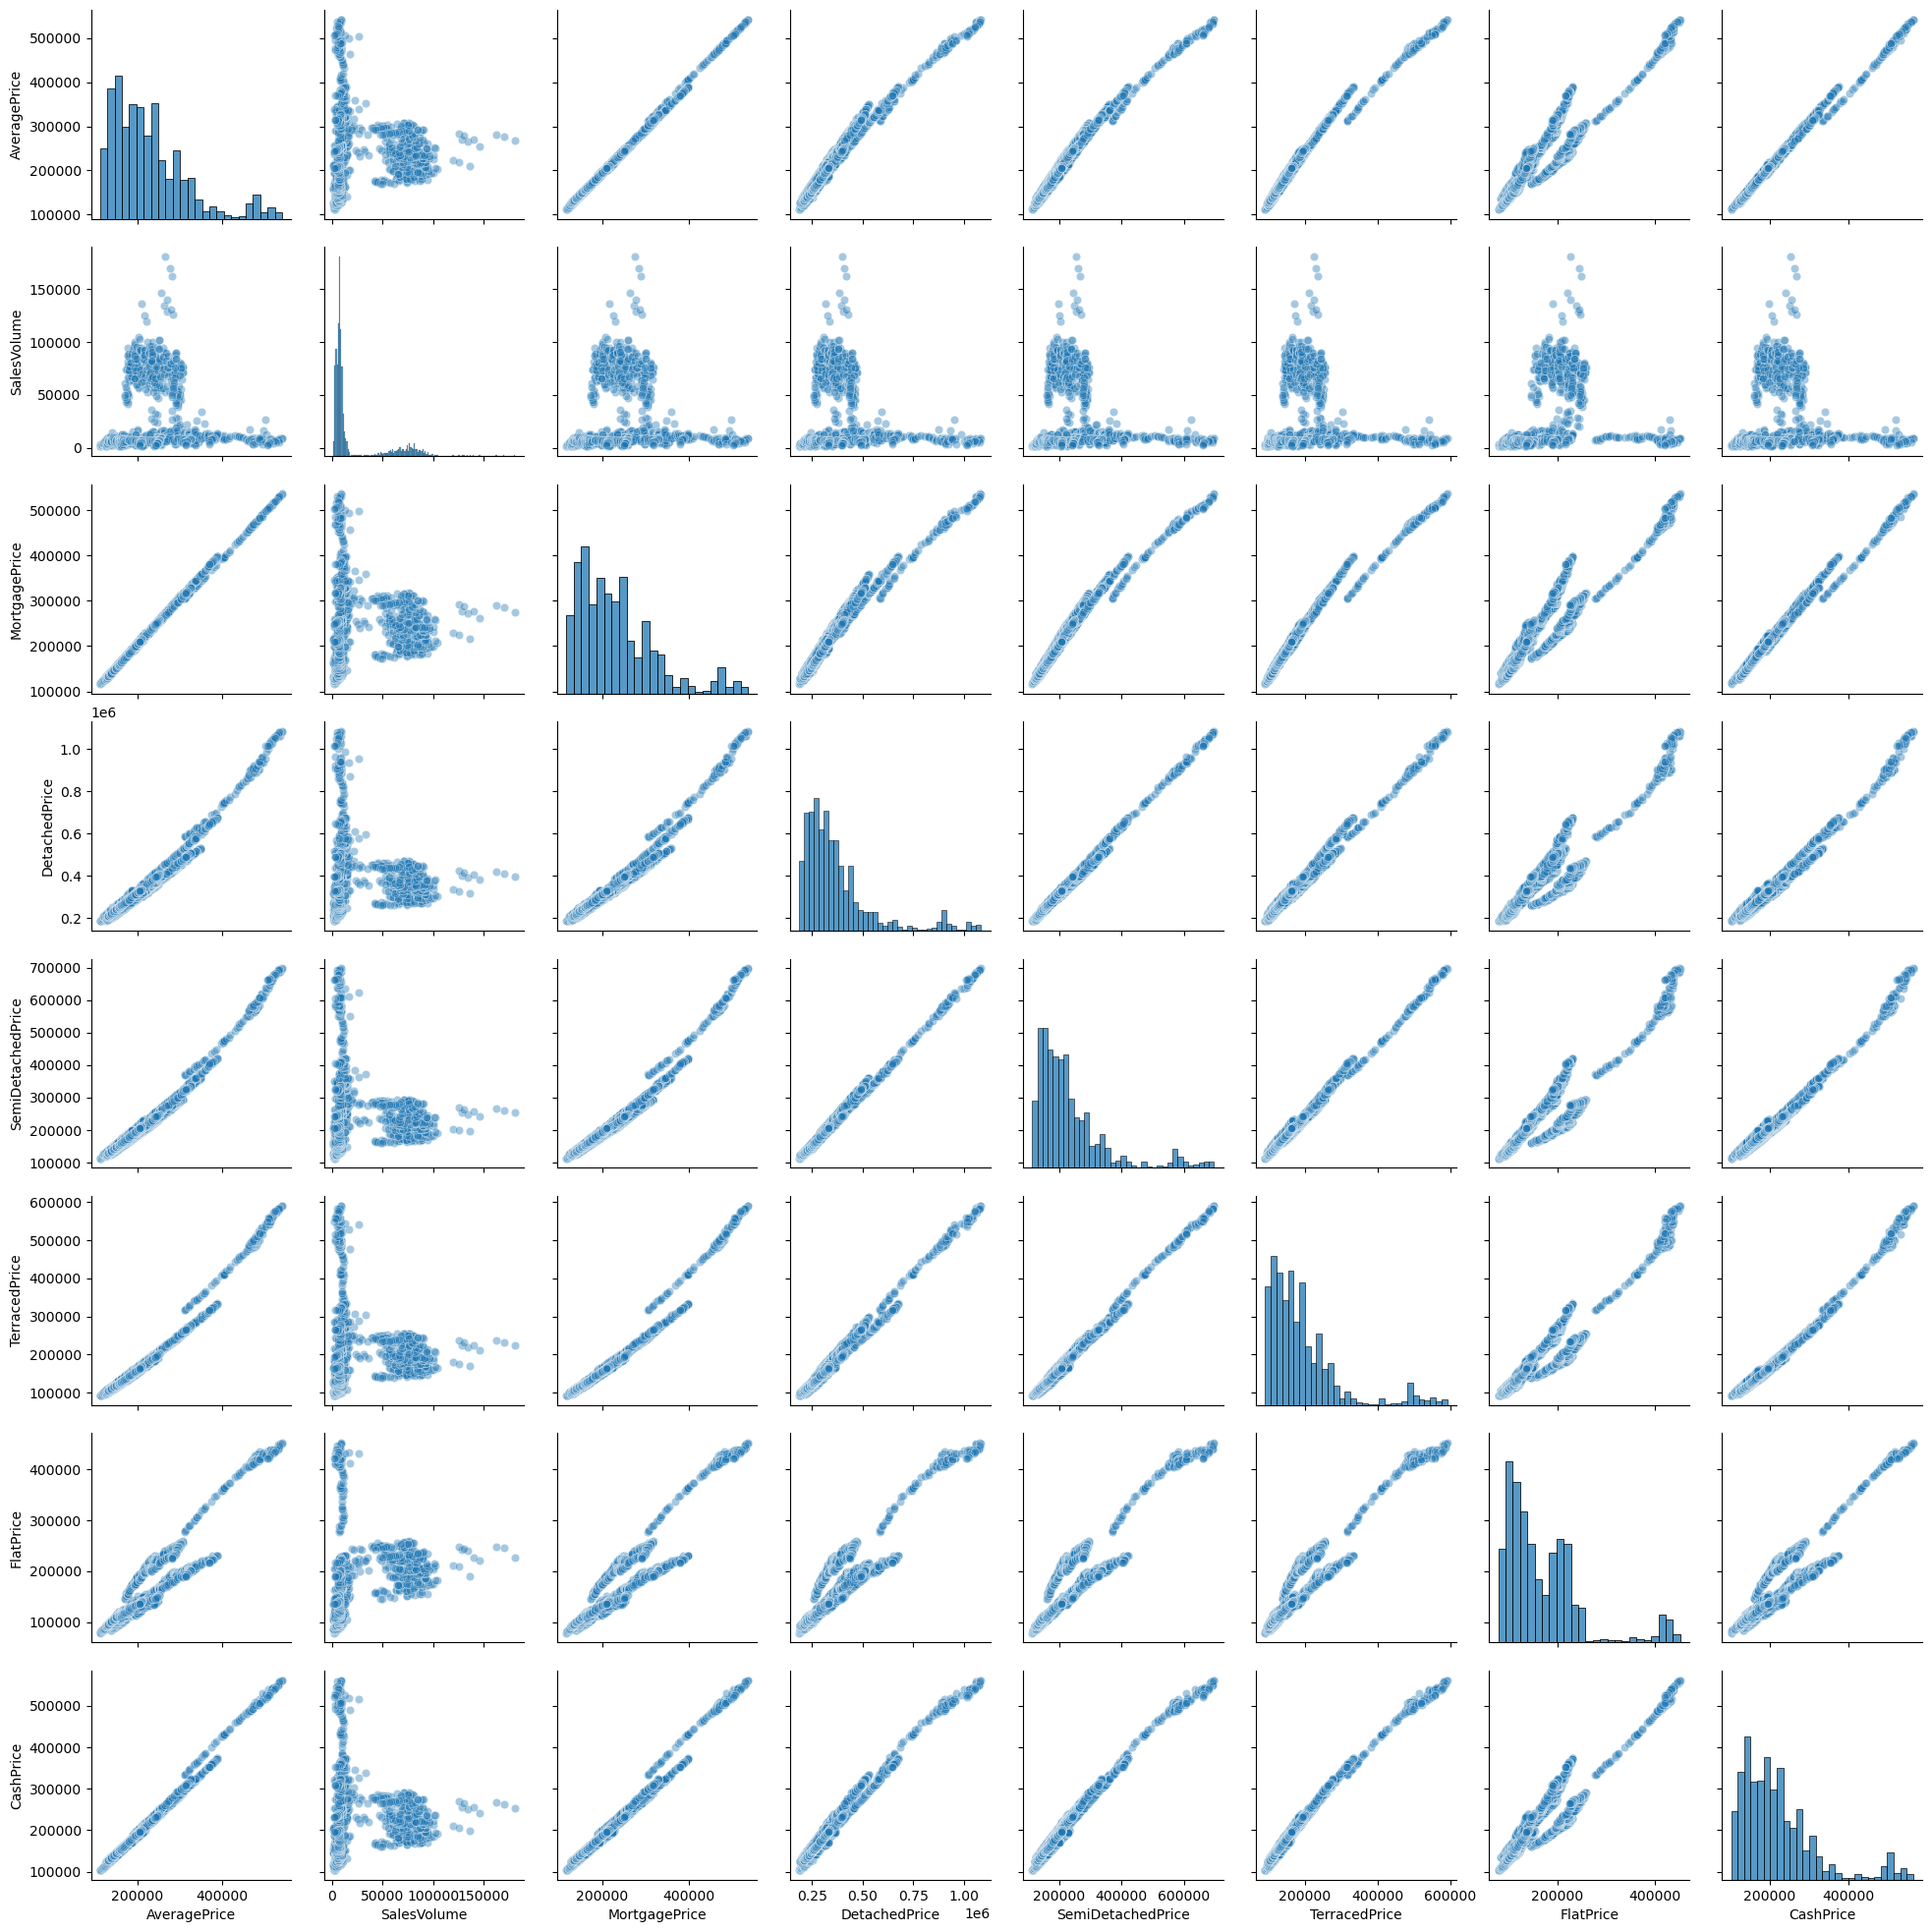

In [ ]:
sns.pairplot(df[['AveragePrice', 'SalesVolume', 'MortgagePrice', 'DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice', 'CashPrice']], kind='scatter', plot_kws={'alpha': 0.4})

In [ ]:
X = df[['SalesVolume', 'MortgagePrice', 'DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice', 'CashPrice']]
y = df['AveragePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,SalesVolume,MortgagePrice,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,CashPrice
1752,7343.0,133919.0165,211656.2315,129772.2251,104983.2542,95731.84357,127586.5872
1785,7748.0,154060.7128,242607.0764,149123.1691,120990.0834,110085.50040,146479.2250
208,7531.0,294262.4330,430544.1866,291868.1337,239624.1009,191281.12910,271423.0833
1299,13862.0,339609.3663,579268.8984,356317.4126,280886.9409,202088.64400,318464.2963
1468,6238.0,319317.0000,494550.0000,326115.0000,268626.0000,192340.00000,312076.0000
...,...,...,...,...,...,...,...
1130,8711.0,151503.5289,251882.0559,151787.7364,120473.0101,106532.81490,135206.3872
1294,5049.0,328009.9833,554691.8920,344427.1988,268142.3316,199052.24740,306465.4782
860,3562.0,133149.7776,214284.6318,128200.6272,103329.4142,91370.56280,117583.9487
1459,7558.0,323957.0000,497296.0000,329405.0000,272018.0000,198285.00000,315397.0000


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([ 0.00641036,  0.70205662,  0.00181752, -0.01820065,  0.02208246,
       -0.01511987,  0.30267125])

In [ ]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
SalesVolume,0.006410
MortgagePrice,0.702057
DetachedPrice,0.001818
SemiDetachedPrice,-0.018201
TerracedPrice,0.022082
FlatPrice,-0.015120
CashPrice,0.302671
